# TEMPLATE 

  Training, and  Testing.  Measures of perfomance.
  Evaluation of a classification pipeline: standard scaler and perceptron.
  

In [1]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

# Toy Data

Starting with toy data to understand the main characteristics of the models. 
1. Creating artificial data with two characteristics 
    might be useful.

Scikit- learn provides also data sets with real data and all of them are avalaible and easily download and written in the proper formats 

https://scikit-learn.org/stable/datasets/index.html

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=1000, shuffle=True, noise=None, random_state=None, factor=0.4)

In [3]:
print(np.unique(y_blobs))

[0 1]


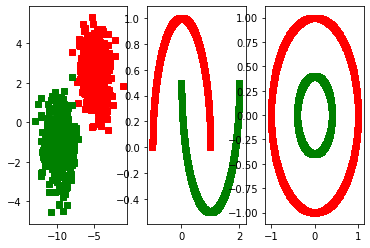

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )
#ax1.set_aspect('equal')
ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )


# Model  Evaluation
Read the section 4.5 (4.5.1 and 4.5.3)

Tan , Steinback and Kumar: Introduction to Data Mining

**or** the following  technical report

https://arxiv.org/abs/1811.12808


The following code introduces the main steps of the most used strategies to evaluate a model

### Learning  and testing

In [5]:
# The Data set
X=X_moon
y=y_moon

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

# Strategy of Evaluation I:  Train and Test with hold-out

Aplicable if the data set is large.

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    
    
    

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
Xs=scaler.fit_transform(X_train)

Xtest=scaler.transform(X_test)
    

In [ ]:
from sklearn.linear_model import Perceptron
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#Learning
ppn.fit(X_train,y_train)



In [ ]:
y_pred=ppn.predict(X_test)
print(confusion_matrix(y_test,y_pred))

In [ ]:
plot_confusion_matrix(ppn, X_test, y_test)  
plt.show() 

### Exercise: 
1. Try to understand the contents of the confusion matrix . Describe each of the entries by your own words
2. Using the confusion matrix estimate: accuracy, recall, precision  
3. Use the other facilities of the package sklearn.metrics to estimate the scores.


# Strategy of Evaluation II:  K-fold train and test


The most widely used strategy to evalaute a classifier when the data set is not long enough

In [ ]:
 from sklearn.model_selection import StratifiedKFold
    

In [ ]:
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#### pre-processing included in the classification pipeline
##### 5-fold cross-validation.

In [ ]:
k_fold = StratifiedKFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X,y):
    scaler = StandardScaler() 
    X_train=X[train_indices]
   
    Xs=scaler.fit_transform(X_train)

    Xtest=scaler.transform(X[test_indices])
    
    ppn.fit(Xs,y[train_indices])
    
    y_pred=ppn.predict(Xtest)
    print(confusion_matrix(y[test_indices],y_pred))
    
    

### Exercise: introduce in the loop  the calculation of scores using the facilities of the package sklearn.metrics
